In [1]:
# Time Series Forecasting using 1D covnet and LSTM layers
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
tf.random.set_seed(51)
np.random.seed(51)

In [2]:
print(tf.__version__)

2.12.0


In [3]:
df = pd.read_csv('sunspots.csv', index_col=0)
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [4]:
# Converting data values to numpy for better and faster processing
time_index = np.array(df['Date'])
data = np.array(df['Monthly Mean Total Sunspot Number'])

In [5]:
# Hyper-parameters to tune
SPLIT_RATIO = 0.8
WINDOW_SIZE = 60
BATCH_SIZE = 32
SHUFFLE_BUFFER = 1000

# Dividing into train-test split
split_index = int(SPLIT_RATIO * data.shape[0])


# Train-Test Split
train_data = data[:split_index]
train_time = time_index[:split_index]

test_data = data[split_index:]
test_time = time_index[split_index:]

In [7]:
# utility function
def ts_data_generator(data, window_size, batch_size, shuffle_buffer):
  '''
  Utility function for time series data generation in batches
  '''
  ts_data = tf.data.Dataset.from_tensor_slices(data)
  ts_data = ts_data.window(window_size + 1, shift=1, drop_remainder=True)
  ts_data = ts_data.flat_map(lambda window: window.batch(window_size + 1))
  ts_data = ts_data.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  ts_data = ts_data.batch(batch_size).prefetch(1)
  return ts_data

In [8]:
train_dataset = ts_data_generator(train_data, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER)
test_dataset = ts_data_generator(test_data, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER)

In [9]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

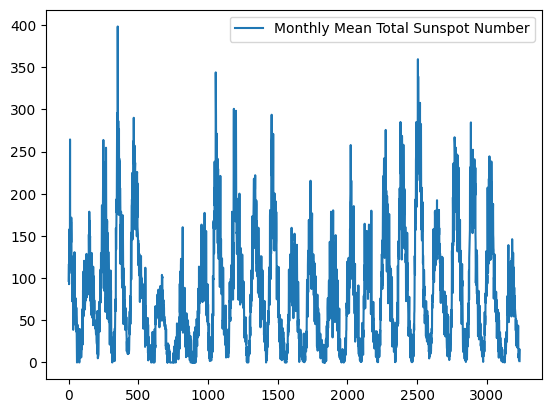

In [10]:
# Let's visualize the series
df.plot()
plt.show()

## making TensorFlow DNN model

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[WINDOW_SIZE], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9))
model.fit(train_dataset, epochs=200,validation_data = test_dataset)

Epoch 1/200
79/79 [==============================] - 2s 10ms/step - loss: nan - val_loss: nan
Epoch 2/200
79/79 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 3/200
79/79 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 7/200
79/79 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 8/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 9/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 10/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 11/200
79/79 [==============================] - 1s 8ms/step - 

79/79 [==============================] - 1s 8ms/step - loss: nan - val_loss: nan
Epoch 89/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 90/200
79/79 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 91/200
79/79 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 92/200
79/79 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 93/200
79/79 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 94/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 95/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 96/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 97/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 98/200
79/79 [==============================] - 1s 6ms/step - loss:

79/79 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 175/200
79/79 [==============================] - 1s 10ms/step - loss: nan - val_loss: nan
Epoch 176/200
79/79 [==============================] - 1s 8ms/step - loss: nan - val_loss: nan
Epoch 177/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 178/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 179/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 180/200
79/79 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 181/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 182/200
79/79 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 183/200
79/79 [==============================] - 1s 8ms/step - loss: nan - val_loss: nan
Epoch 184/200
79/79 [==============================] - 1s 7ms/s

In [12]:
# evaludting model
time_int = np.array(list(range(len(data))))
time_int

array([   0,    1,    2, ..., 3232, 3233, 3234])

In [15]:
forecast=[]
for time in range(len(data) - WINDOW_SIZE):
  forecast.append(model.predict(data[time:time + WINDOW_SIZE][np.newaxis]))

forecast = forecast[split_index-WINDOW_SIZE:]
results = np.array(forecast)[:, 0, 0]
     

1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 115ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


In [18]:
# Overall Error
error = tf.keras.metrics.mean_absolute_error(test_data, results).numpy()
print(error)

nan


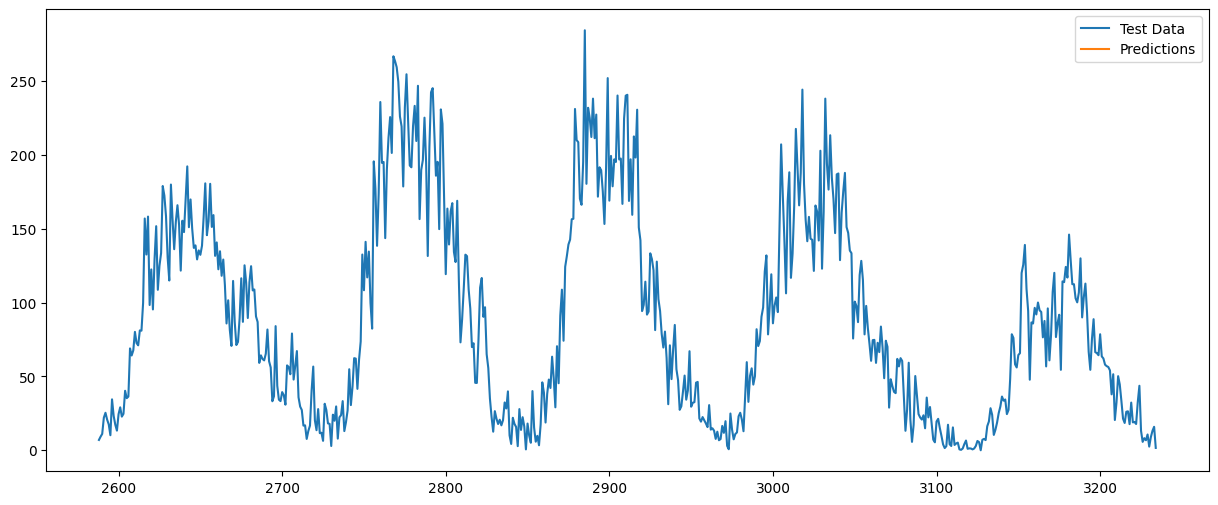

In [19]:
# visualising 
plt.figure(figsize=(15, 6))

plt.plot(list(range(split_index,len(data))), test_data, label = 'Test Data')
plt.plot(list(range(split_index,len(data))), results, label = 'Predictions')
plt.legend()
plt.show()

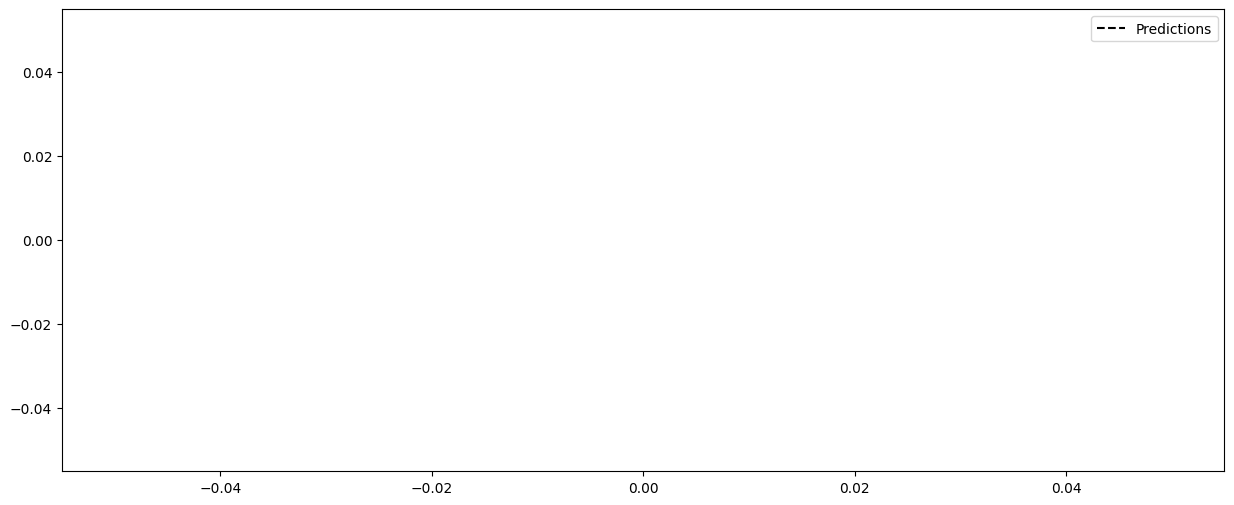

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(list(range(split_index,len(data))), results, label = 'Predictions', color = 'k', linestyle = '--')
plt.fill_between(range(split_index,len(data)), results - error, results + error, alpha = 0.5, color = 'red')
plt.legend()
plt.show()

In [21]:
# here comes complexity for adding hybrid networks

## 1D CNN + LSTM for feature extraction

In [22]:
# Expanding data into tensors
tensor_train_data = tf.expand_dims(train_data, axis=-1)
tensor_test_data = tf.expand_dims(test_data, axis=-1)

tensor_train_dataset = ts_data_generator(tensor_train_data, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER)
tensor_test_dataset = ts_data_generator(tensor_test_data, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER)

In [23]:
# Combination model of 1D CNN and LSTM
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

In [24]:
# Using callbacks to optimize the learning rates
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(tensor_train_dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
79/79 [==============================] - 11s 56ms/step - loss: 80.3387 - mae: 80.8299 - lr: 1.0000e-08
Epoch 2/100
79/79 [==============================] - 5s 56ms/step - loss: 80.3384 - mae: 80.8296 - lr: 1.1220e-08
Epoch 3/100
79/79 [==============================] - 4s 54ms/step - loss: 80.3381 - mae: 80.8293 - lr: 1.2589e-08
Epoch 4/100
79/79 [==============================] - 4s 55ms/step - loss: 80.3377 - mae: 80.8289 - lr: 1.4125e-08
Epoch 5/100
79/79 [==============================] - 5s 57ms/step - loss: 80.3373 - mae: 80.8285 - lr: 1.5849e-08
Epoch 6/100
79/79 [==============================] - 5s 57ms/step - loss: 80.3369 - mae: 80.8280 - lr: 1.7783e-08
Epoch 7/100
79/79 [==============================] - 5s 60ms/step - loss: 80.3363 - mae: 80.8274 - lr: 1.9953e-08
Epoch 8/100
79/79 [==============================] - 5s 57ms/step - loss: 80.3357 - mae: 80.8269 - lr: 2.2387e-08
Epoch 9/100
79/79 [==============================] - 4s 53ms/step - loss: 80.3351 - mae

79/79 [==============================] - 6s 71ms/step - loss: 75.2855 - mae: 75.7820 - lr: 3.5481e-05
Epoch 73/100
79/79 [==============================] - 5s 55ms/step - loss: 73.1496 - mae: 73.6465 - lr: 3.9811e-05
Epoch 74/100
79/79 [==============================] - 5s 66ms/step - loss: 69.6896 - mae: 70.1865 - lr: 4.4668e-05
Epoch 75/100
79/79 [==============================] - 6s 71ms/step - loss: 64.5513 - mae: 65.0488 - lr: 5.0119e-05
Epoch 76/100
79/79 [==============================] - 5s 62ms/step - loss: 58.4021 - mae: 58.8999 - lr: 5.6234e-05
Epoch 77/100
79/79 [==============================] - 5s 56ms/step - loss: 54.3870 - mae: 54.8848 - lr: 6.3096e-05
Epoch 78/100
79/79 [==============================] - 5s 62ms/step - loss: 53.4722 - mae: 53.9703 - lr: 7.0795e-05
Epoch 79/100
79/79 [==============================] - 5s 65ms/step - loss: 53.3209 - mae: 53.8194 - lr: 7.9433e-05
Epoch 80/100
79/79 [==============================] - 6s 75ms/step - loss: 53.2595 - mae: 53.

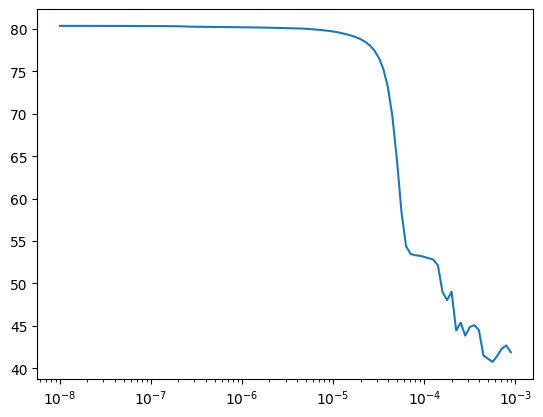

In [25]:
plt.semilogx(history.history["lr"], history.history["loss"])

In [26]:
optimizer = tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(tensor_train_dataset, epochs=200, validation_data=tensor_test_dataset)

Epoch 1/200
79/79 [==============================] - 13s 81ms/step - loss: 53.7796 - mae: 54.2779 - val_loss: 56.3848 - val_mae: 56.8839
Epoch 2/200
79/79 [==============================] - 6s 74ms/step - loss: 55.3149 - mae: 55.8131 - val_loss: 56.2052 - val_mae: 56.7038
Epoch 3/200
79/79 [==============================] - 8s 97ms/step - loss: 52.8410 - mae: 53.3391 - val_loss: 60.2594 - val_mae: 60.7578
Epoch 4/200
79/79 [==============================] - 6s 75ms/step - loss: 52.6902 - mae: 53.1882 - val_loss: 55.2359 - val_mae: 55.7338
Epoch 5/200
79/79 [==============================] - 6s 74ms/step - loss: 50.8348 - mae: 51.3327 - val_loss: 56.8891 - val_mae: 57.3875
Epoch 6/200
79/79 [==============================] - 7s 83ms/step - loss: 52.2986 - mae: 52.7964 - val_loss: 59.0821 - val_mae: 59.5811
Epoch 7/200
79/79 [==============================] - 6s 72ms/step - loss: 53.4763 - mae: 53.9749 - val_loss: 57.2738 - val_mae: 57.7717
Epoch 8/200
79/79 [============================

Epoch 61/200
79/79 [==============================] - 6s 68ms/step - loss: 52.4403 - mae: 52.9381 - val_loss: 56.7642 - val_mae: 57.2626
Epoch 62/200
79/79 [==============================] - 6s 71ms/step - loss: 52.3845 - mae: 52.8828 - val_loss: 56.5543 - val_mae: 57.0515
Epoch 63/200
79/79 [==============================] - 6s 68ms/step - loss: 52.4213 - mae: 52.9190 - val_loss: 56.5510 - val_mae: 57.0486
Epoch 64/200
79/79 [==============================] - 5s 63ms/step - loss: 52.4711 - mae: 52.9700 - val_loss: 56.5506 - val_mae: 57.0487
Epoch 65/200
79/79 [==============================] - 6s 68ms/step - loss: 52.5098 - mae: 53.0081 - val_loss: 56.5452 - val_mae: 57.0445
Epoch 66/200
79/79 [==============================] - 6s 78ms/step - loss: 52.4523 - mae: 52.9505 - val_loss: 56.6485 - val_mae: 57.1470
Epoch 67/200
79/79 [==============================] - 6s 77ms/step - loss: 52.6187 - mae: 53.1164 - val_loss: 56.6729 - val_mae: 57.1715
Epoch 68/200
79/79 [=====================

79/79 [==============================] - 5s 62ms/step - loss: 52.5060 - mae: 53.0040 - val_loss: 56.6135 - val_mae: 57.1127
Epoch 121/200
79/79 [==============================] - 5s 63ms/step - loss: 52.7646 - mae: 53.2629 - val_loss: 56.8440 - val_mae: 57.3427
Epoch 122/200
79/79 [==============================] - 5s 62ms/step - loss: 52.7562 - mae: 53.2551 - val_loss: 56.5758 - val_mae: 57.0739
Epoch 123/200
79/79 [==============================] - 5s 62ms/step - loss: 52.5052 - mae: 53.0039 - val_loss: 56.5864 - val_mae: 57.0836
Epoch 124/200
79/79 [==============================] - 5s 62ms/step - loss: 53.0514 - mae: 53.5492 - val_loss: 56.5888 - val_mae: 57.0864
Epoch 125/200
79/79 [==============================] - 5s 60ms/step - loss: 54.1080 - mae: 54.6066 - val_loss: 59.6181 - val_mae: 60.1159
Epoch 126/200
79/79 [==============================] - 5s 65ms/step - loss: 53.4734 - mae: 53.9717 - val_loss: 57.9506 - val_mae: 58.4488
Epoch 127/200
79/79 [===========================

79/79 [==============================] - 5s 58ms/step - loss: 52.3506 - mae: 52.8487 - val_loss: 56.5933 - val_mae: 57.0930
Epoch 180/200
79/79 [==============================] - 6s 71ms/step - loss: 52.3168 - mae: 52.8159 - val_loss: 56.5555 - val_mae: 57.0528
Epoch 181/200
79/79 [==============================] - 5s 62ms/step - loss: 52.4424 - mae: 52.9413 - val_loss: 56.6795 - val_mae: 57.1785
Epoch 182/200
79/79 [==============================] - 5s 63ms/step - loss: 52.3509 - mae: 52.8489 - val_loss: 56.6382 - val_mae: 57.1367
Epoch 183/200
79/79 [==============================] - 5s 59ms/step - loss: 52.2728 - mae: 52.7707 - val_loss: 56.5555 - val_mae: 57.0535
Epoch 184/200
79/79 [==============================] - 5s 63ms/step - loss: 52.4292 - mae: 52.9266 - val_loss: 56.5648 - val_mae: 57.0623
Epoch 185/200
79/79 [==============================] - 5s 63ms/step - loss: 52.3277 - mae: 52.8263 - val_loss: 56.6417 - val_mae: 57.1411
Epoch 186/200
79/79 [===========================

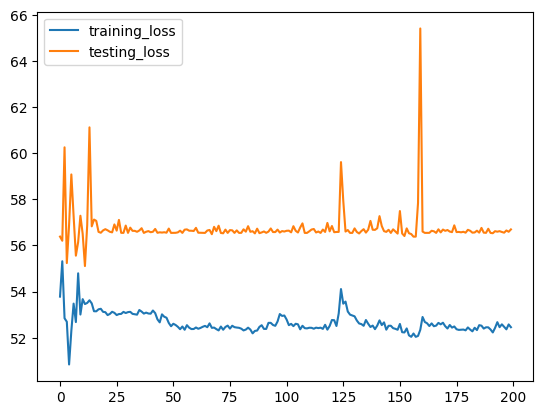

In [27]:
plt.plot(list(range(200)), history.history["loss"], label = "training_loss")
plt.plot(list(range(200)), history.history["val_loss"], label = "testing_loss")
plt.legend()
plt.show()

### Model Testing performance

In [28]:
# creating a function to test its performance
def model_forecast(model, data, window_size):
    ds = tf.data.Dataset.from_tensor_slices(data)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [29]:
rnn_forecast = model_forecast(model, data[..., np.newaxis], WINDOW_SIZE)
rnn_forecast = rnn_forecast[split_index - WINDOW_SIZE:-1, -1, 0]

100/100 [==============================] - 5s 22ms/step


In [30]:
# printing the error
error = tf.keras.metrics.mean_absolute_error(test_data, rnn_forecast).numpy()
print(error)

57.23337


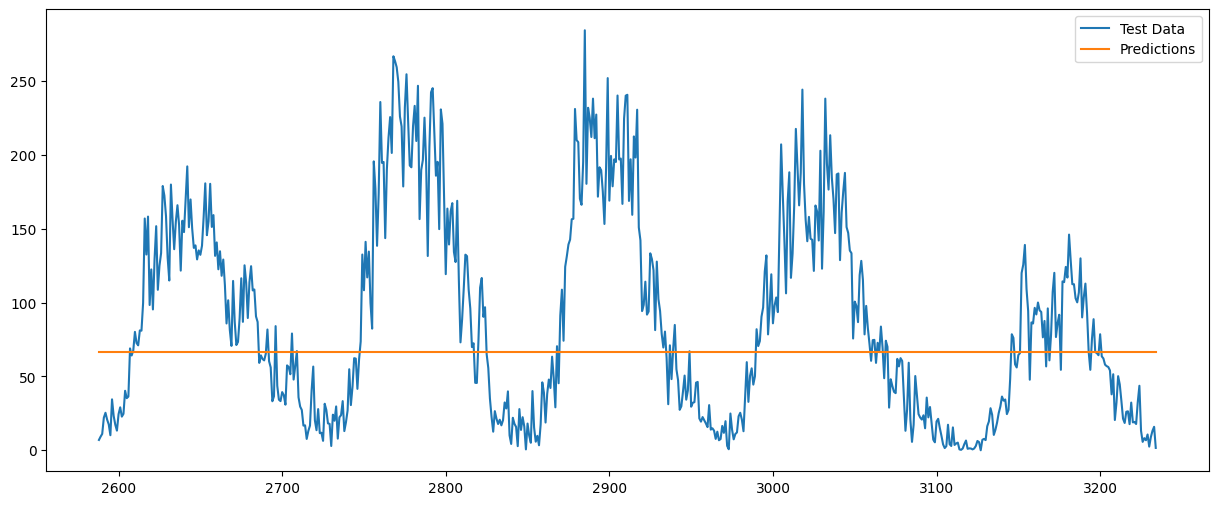

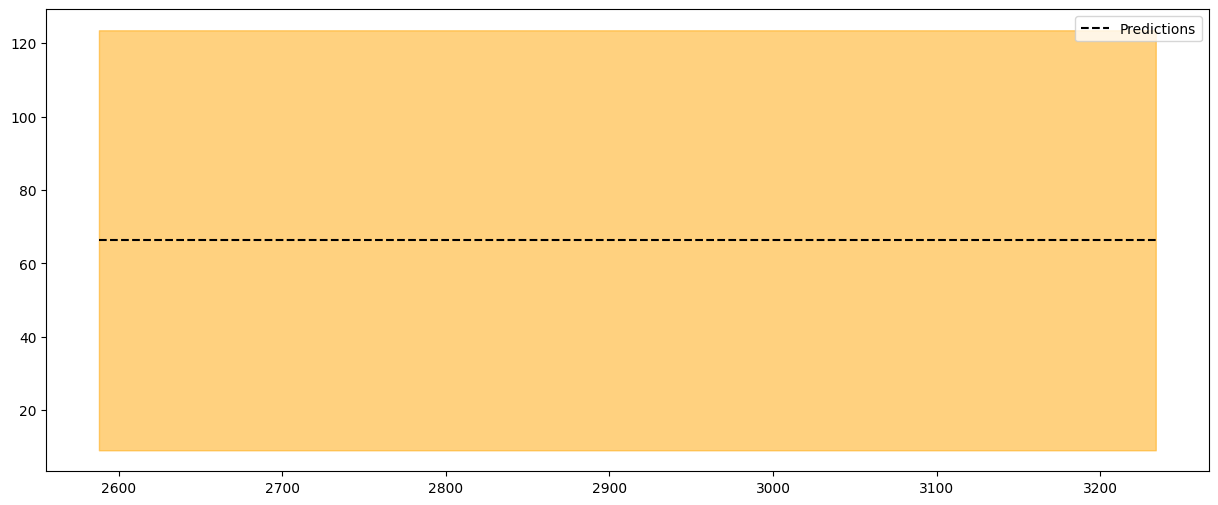

In [31]:
# showing imagery and graphical representations
plt.figure(figsize=(15, 6))

plt.plot(list(range(split_index,len(data))), test_data, label = 'Test Data')
plt.plot(list(range(split_index,len(data))), rnn_forecast, label = 'Predictions')
#plt.fill_between(range(split_index,len(data)), results - error, results + error, alpha = 0.5, color = 'red')
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
# Plotting with Confidence Intervals
#plt.plot(list(range(split_index,len(data))), test_data, label = 'Test Data')
plt.plot(list(range(split_index,len(data))), rnn_forecast, label = 'Predictions', color = 'k', linestyle = '--')
plt.fill_between(range(split_index,len(data)), rnn_forecast - error, rnn_forecast + error, alpha = 0.5, color = 'orange')
plt.legend()
plt.show()